In [ ]:
import pandas as pd
import ast
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import zipfile

# Extract the CSV file from the ZIP, excluding macOS metadata
with zipfile.ZipFile("df_aggregated.csv.zip") as z:
    csv_files = [f for f in z.namelist() if f.endswith('.csv') and not f.startswith('__MACOSX')]
    df = pd.read_csv(z.open(csv_files[0]))

In [3]:
df.head(11)
#df.shape

,position,datetime,Wildfire,latitude,longitude,pr,rmax,rmin,sph,srad,tmmn,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd
0,"(np.float64(48.1284309990626), np.float64(-97....",2018-08-15,"(0, 'No')",48.128431,-97.276685,2.166667,92.276667,46.860000,0.006696,165.786667,279.256667,291.265000,4.178333,21.016667,16.566667,15.885000,29.850000,3.950000,2.873333,0.631500
1,"(np.float64(36.9504999990934), np.float64(-113...",2016-06-02,"(0, 'No')",36.950500,-113.797100,0.340000,23.663333,7.468333,0.004326,329.026667,295.795000,313.468333,3.410000,76.966667,3.171667,3.890000,103.116667,12.905000,9.051667,4.552167
2,"(np.float64(39.8561699990717), np.float64(-120...",2014-07-10,"(0, 'No')",39.856170,-120.331600,0.833333,59.361667,18.020000,0.005549,279.586667,282.161667,301.018333,3.390000,51.133333,7.980000,8.490000,70.216667,8.181667,5.983333,1.743833
3,"(np.float64(34.0745399991241), np.float64(-117...",2018-06-09,"(0, 'Yes')",34.074540,-117.998910,0.000000,77.048333,30.630000,0.010556,324.388333,292.303333,305.308333,2.360000,42.200000,10.116667,10.416667,59.350000,7.863333,6.341667,1.884667
4,"(np.float64(33.4813199991315), np.float64(-110...",2015-08-01,"(0, 'No')",33.481320,-110.869100,1.528333,63.200000,24.391667,0.010275,261.301667,294.301667,307.678333,3.211667,37.583333,9.160000,10.235000,58.733333,8.971667,6.571667,2.544167
5,"(np.float64(35.8630859991039), np.float64(-120...",2017-07-08,"(0, 'No')",35.863086,-120.814287,0.000000,87.413333,19.850000,0.009247,319.430000,287.408333,309.953333,3.181667,46.650000,11.120000,11.036667,57.666667,9.961667,7.355000,2.524500
6,"(np.float64(34.5723799991181), np.float64(-118...",2022-04-22,"(0, 'No')",34.572380,-118.004860,0.000000,50.248333,13.606667,0.004599,342.660000,285.271667,302.123333,4.476667,77.583333,5.953333,6.728333,84.716667,10.828333,7.693333,2.131500
7,"(np.float64(38.4133869990813), np.float64(-120...",2018-04-19,"(0, 'No')",38.413387,-120.669027,0.205000,80.173333,40.410000,0.007992,322.258333,284.101667,297.978333,2.545000,30.316667,12.286667,15.341667,39.983333,6.280000,5.153333,1.083333
8,"(np.float64(48.0666999990624), np.float64(-106...",2014-06-14,"(0, 'No')",48.066700,-106.134000,1.700000,86.358333,26.935000,0.008569,289.330000,285.893333,302.806667,3.758333,31.533333,11.450000,13.335000,45.133333,7.988333,6.028333,1.581667
9,"(np.float64(45.429099999057), np.float64(-109....",2015-08-01,"(0, 'No')",45.429100,-109.055600,0.671667,70.723333,19.893333,0.005815,226.003333,281.910000,299.895000,2.955000,38.233333,9.783333,11.525000,55.416667,6.666667,4.783333,1.574000


In [4]:
Y=0
N=0
for i in range(len(df)):
    t=ast.literal_eval(df.iloc[i]["Wildfire"])
    if t[1]=="Yes":
        Y+=1
    else : 
        N+=1
print(Y)

33471


In [5]:
print(df["Wildfire"].value_counts())

Wildfire
(0, 'No')     93328
(0, 'Yes')    33471
Name: count, dtype: int64


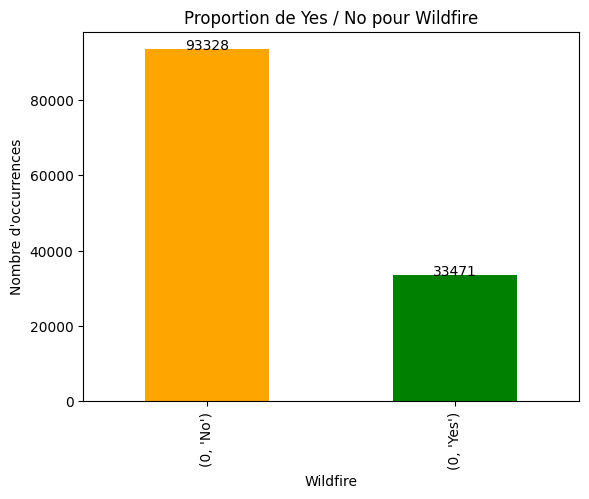

In [6]:
import matplotlib.pyplot as plt

# Compter les occurrences de chaque valeur
counts = df["Wildfire"].value_counts()

# Tracer un histogramme (barres)
counts.plot(kind="bar", color=["orange", "green"])

# Ajouter un titre et des labels
plt.title("Proportion de Yes / No pour Wildfire")
plt.xlabel("Wildfire")
plt.ylabel("Nombre d'occurrences")

# Afficher les valeurs au-dessus des barres (optionnel)
for i, val in enumerate(counts):
    plt.text(i, val + 0.1, str(val), ha='center')

plt.show()

In [7]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['month'] = (df['datetime'] + pd.Timedelta(days=60)).dt.month
df.head()

,position,datetime,Wildfire,latitude,longitude,pr,rmax,rmin,sph,srad,...,tmmx,vs,bi,fm100,fm1000,erc,etr,pet,vpd,month
0,"(np.float64(48.1284309990626), np.float64(-97....",2018-08-15,"(0, 'No')",48.128431,-97.276685,2.166667,92.276667,46.860000,0.006696,165.786667,...,291.265000,4.178333,21.016667,16.566667,15.885000,29.850000,3.950000,2.873333,0.631500,10
1,"(np.float64(36.9504999990934), np.float64(-113...",2016-06-02,"(0, 'No')",36.950500,-113.797100,0.340000,23.663333,7.468333,0.004326,329.026667,...,313.468333,3.410000,76.966667,3.171667,3.890000,103.116667,12.905000,9.051667,4.552167,8
2,"(np.float64(39.8561699990717), np.float64(-120...",2014-07-10,"(0, 'No')",39.856170,-120.331600,0.833333,59.361667,18.020000,0.005549,279.586667,...,301.018333,3.390000,51.133333,7.980000,8.490000,70.216667,8.181667,5.983333,1.743833,9
3,"(np.float64(34.0745399991241), np.float64(-117...",2018-06-09,"(0, 'Yes')",34.074540,-117.998910,0.000000,77.048333,30.630000,0.010556,324.388333,...,305.308333,2.360000,42.200000,10.116667,10.416667,59.350000,7.863333,6.341667,1.884667,8
4,"(np.float64(33.4813199991315), np.float64(-110...",2015-08-01,"(0, 'No')",33.481320,-110.869100,1.528333,63.200000,24.391667,0.010275,261.301667,...,307.678333,3.211667,37.583333,9.160000,10.235000,58.733333,8.971667,6.571667,2.544167,9


In [8]:
df['label'] = df['Wildfire'].apply(lambda x: 1 if ast.literal_eval(x)[1].lower() == 'yes' else 0)
df.head(100)

,position,datetime,Wildfire,latitude,longitude,pr,rmax,rmin,sph,srad,...,vs,bi,fm100,fm1000,erc,etr,pet,vpd,month,label
0,"(np.float64(48.1284309990626), np.float64(-97....",2018-08-15,"(0, 'No')",48.128431,-97.276685,2.166667,92.276667,46.860000,0.006696,165.786667,...,4.178333,21.016667,16.566667,15.885000,29.850000,3.950000,2.873333,0.631500,10,0
1,"(np.float64(36.9504999990934), np.float64(-113...",2016-06-02,"(0, 'No')",36.950500,-113.797100,0.340000,23.663333,7.468333,0.004326,329.026667,...,3.410000,76.966667,3.171667,3.890000,103.116667,12.905000,9.051667,4.552167,8,0
2,"(np.float64(39.8561699990717), np.float64(-120...",2014-07-10,"(0, 'No')",39.856170,-120.331600,0.833333,59.361667,18.020000,0.005549,279.586667,...,3.390000,51.133333,7.980000,8.490000,70.216667,8.181667,5.983333,1.743833,9,0
3,"(np.float64(34.0745399991241), np.float64(-117...",2018-06-09,"(0, 'Yes')",34.074540,-117.998910,0.000000,77.048333,30.630000,0.010556,324.388333,...,2.360000,42.200000,10.116667,10.416667,59.350000,7.863333,6.341667,1.884667,8,1
4,"(np.float64(33.4813199991315), np.float64(-110...",2015-08-01,"(0, 'No')",33.481320,-110.869100,1.528333,63.200000,24.391667,0.010275,261.301667,...,3.211667,37.583333,9.160000,10.235000,58.733333,8.971667,6.571667,2.544167,9,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(np.float64(33.9484599991256), np.float64(-116...",2019-02-05,"(0, 'No')",33.948460,-116.453900,1.963333,69.560000,26.011667,0.004355,216.556667,...,4.845000,37.150000,11.690000,14.120000,44.383333,5.845000,4.033333,1.018500,4,0
96,"(np.float64(33.6366569991294), np.float64(-116...",2024-11-16,"(0, 'Yes')",33.636657,-116.128275,0.000000,49.616667,11.451667,0.002891,137.230000,...,2.973333,63.133333,7.233333,7.110000,81.166667,5.633333,3.446667,1.540333,1,1
97,"(np.float64(34.4012299991201), np.float64(-89....",2021-08-07,"(0, 'No')",34.401230,-89.139191,3.845000,97.638333,52.911667,0.015060,224.171667,...,2.806667,12.900000,18.060000,20.285000,18.516667,5.040000,4.190000,0.889333,10,0
98,"(np.float64(41.7413699990628), np.float64(-111...",2017-09-07,"(0, 'No')",41.741370,-111.752800,1.788333,79.906667,38.288333,0.004846,164.946667,...,3.413333,25.550000,13.623333,13.786667,39.816667,3.345000,2.413333,0.598000,11,0


pr        float64
rmax      float64
rmin      float64
sph       float64
srad      float64
tmmx      float64
vs        float64
bi        float64
fm100     float64
fm1000    float64
erc       float64
etr       float64
pet       float64
vpd       float64
label       int64
dtype: object


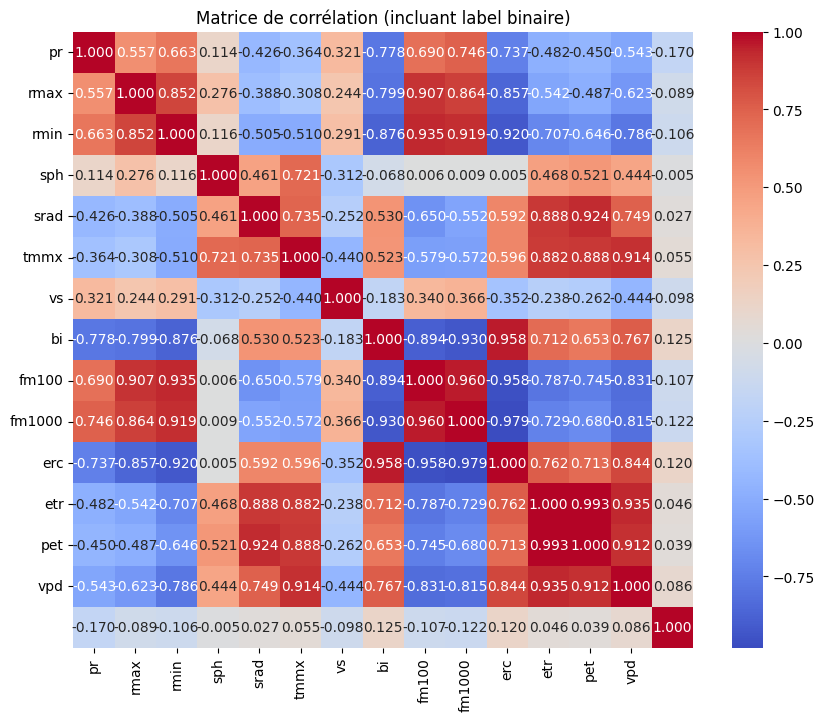

In [9]:
features = ["pr","rmax","rmin","sph","srad","tmmx","vs","bi",
            "fm100","fm1000","erc","etr","pet","vpd"]
columns = features + ['label']
# Nettoyer et convertir en float
for col in columns:
    # Remplace la virgule par un point et supprime les espaces
    df[col] = df[col].astype(str).str.replace(',', '.').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Vérification rapide
print(df[columns].dtypes)

# Calcul de la corrélation
corr = df[columns].corr(method='spearman')

# Affichage de la heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt='.3f', cmap='coolwarm', 
            xticklabels=features, yticklabels=features)
plt.title("Matrice de corrélation (incluant label binaire)")
plt.show()

In [10]:
X = df[features]
#Sparsity check
zero = (X == 0)
nan = X.isna()
sparsity = (zero | nan).mean().mean()
print(f"Sparsity of the feature matrix: {sparsity:.4f}")

Sparsity of the feature matrix: 0.0033


That's very low. We don't need to implement the Sparsity-aware Split Finding of the 3.4 section [1]

<br>
<br>
<br>

In [11]:
from utils import split_train_test
from xgboost_from_scratch import XGBoostClassifier
# Train/test split using our helper
train_df, test_df = split_train_test(df, test_size=0.2, random_state=21)

X_train = train_df[features].to_numpy()
y_train = train_df['label'].to_numpy()
X_test = test_df[features].to_numpy()
y_test = test_df['label'].to_numpy()

In [14]:
# Compare custom greedy, local approximation, and library XGBoost
import time
from xgboost import XGBClassifier as XGBC

solvers = ['greedy', 'local', 'xgb_library']
results = []

for solver in solvers:
    if solver == 'xgb_library':
        model = XGBC(
            max_depth=5,
            learning_rate=0.4,
            n_estimators=5,
            reg_lambda=1.5,
            gamma=1,
            min_child_weight=1,
            subsample=1.0,
            colsample_bytree=1.0,
            eval_metric='logloss'
        )
        t0 = time.time()
        model.fit(X_train, y_train)
        elapsed = time.time() - t0
        probas = model.predict_proba(X_test)[:, 1]
    else:
        model = XGBoostClassifier()
        t0 = time.time()
        model.fit(X_train, y_train,
                  max_depth=5,
                  min_leaf=5,
                  min_child_weight=1,
                  learning_rate=0.4,
                  boosting_rounds=5,
                  lambda_=1.5,
                  gamma=1,
                  solver=solver,
                  eps=0.1)
        elapsed = time.time() - t0
        probas = model.predict_proba(X_test)
    preds = (probas > 0.5).astype(int)
    acc = (preds == y_test).mean()
    results.append((solver, acc, elapsed))

for solver, acc, elapsed in results:
    print(f"Solver={solver:12s} | Test accuracy={acc:.4f} | Train time={elapsed:.3f}s")


Solver=greedy       | Test accuracy=0.7468 | Train time=18.493s
Solver=local        | Test accuracy=0.7458 | Train time=2.930s
Solver=xgb_library  | Test accuracy=0.7459 | Train time=0.045s
